<a href="https://colab.research.google.com/github/dayserivera/DSA_FINAL/blob/main/Copy_of_TCC_motif_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stumpy
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
from sklearn import preprocessing
from scipy.signal import find_peaks
import math as math

In [ ]:
#Pesquisar para o que isso é usado
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [ ]:
filenameComplete = "entry_points.txt.csv"
filenameQuery = "query_entrypoints.txt.csv"
poli_df = pd.read_csv("/content/" + filenameComplete)

keypoint = "LEFT_WRIST"

poli_df.head()

,NOSE_X,NOSE_Y,NOSE_SCORE,NECK_X,NECK_Y,NECK_SCORE,RIGHT_SHOULDER_X,RIGHT_SHOULDER_Y,RIGHT_SHOULDER_SCORE,RIGHT_ELBOW_X,...,RIGHT_EYE_SCORE,LEFT_EYE_X,LEFT_EYE_Y,LEFT_EYE_SCORE,RIGHT_EAR_X,RIGHT_EAR_Y,RIGHT_EAR_SCORE,LEFT_EAR_X,LEFT_EAR_Y,LEFT_EAR_SCORE
0,487.637,440.470,1.00797,492.804,560.997,0.969712,403.737,561.047,0.942342,372.293,...,0.955070,508.714,424.811,0.963619,440.425,450.914,0.927100,534.928,445.722,0.912001
1,487.647,440.482,1.00729,492.797,560.992,0.963398,403.733,561.045,0.940091,372.503,...,0.954600,508.712,424.826,0.962963,440.440,450.936,0.926659,534.920,445.721,0.909128
2,487.645,440.488,1.01189,492.781,560.979,0.966994,403.720,561.030,0.940371,372.532,...,0.957740,513.593,424.860,0.965580,440.436,450.991,0.924414,534.907,445.769,0.903168
3,487.634,440.494,1.00853,492.801,560.971,0.965722,403.722,560.987,0.940461,372.374,...,0.956486,513.598,424.872,0.964386,440.459,450.944,0.925854,534.926,445.785,0.911582
4,487.619,440.486,1.01382,492.800,560.974,0.966152,403.750,561.007,0.937240,372.366,...,0.958885,508.701,424.860,0.965557,440.465,451.001,0.922438,534.894,445.804,0.908429


In [ ]:
#poli_df[keypoint + "_SCORE"] = pd.to_numeric(poli_df[keypoint + "_SCORE"])
#poli_df[keypoint + "_SCORE"].describe()
poli_df[keypoint + "_Y"].max()

843.904

In [ ]:
poli_df[keypoint + "_X"].max()

398.386

In [ ]:
#poli_df[keypoint + "_Y"] = pd.to_numeric(poli_df[keypoint + "_Y"])
#poli_df[keypoint + "_X"] = pd.to_numeric(poli_df[keypoint + "_X"])
#poli_df[keypoint + "_X_Y"] = poli_df[keypoint + "_Y"] * poli_df[keypoint + "_X"]
#poli_df = poli_df[[keypoint + '_X_Y']].copy()


poli_df[keypoint + "_Y"] = (pd.to_numeric(poli_df[keypoint + "_Y"]) * 1000).astype('int')
poli_df[keypoint + "_X"] = (pd.to_numeric(poli_df[keypoint + "_X"]) * 1000).astype('int')
poli_df[keypoint + "_Y"] = poli_df[keypoint + "_Y"].map(lambda x: f'{x:0>6}')
poli_df[keypoint + "_X"] = poli_df[keypoint + "_X"].map(lambda x: f'{x:0>6}')
poli_df[keypoint + "_X_Y"] = poli_df[keypoint + "_Y"] + poli_df[keypoint + "_X"]
poli_df[keypoint + "_X_Y"] = pd.to_numeric(poli_df[keypoint + "_X_Y"])
poli_df = poli_df[[keypoint + '_X_Y']].copy()

In [ ]:
poli_df.head()

,LEFT_WRIST_X_Y
0,838545613463
1,838513613271
2,838498613250
3,838471613374
4,838493618559


In [ ]:
poli_df.describe()

,RIGHT_WRIST_X_Y
count,2.152000e+03
mean,6.982297e+11
std,1.265211e+11
min,4.458792e+11
25%,5.716009e+11
50%,7.286612e+11
75%,8.228251e+11
max,8.439044e+11


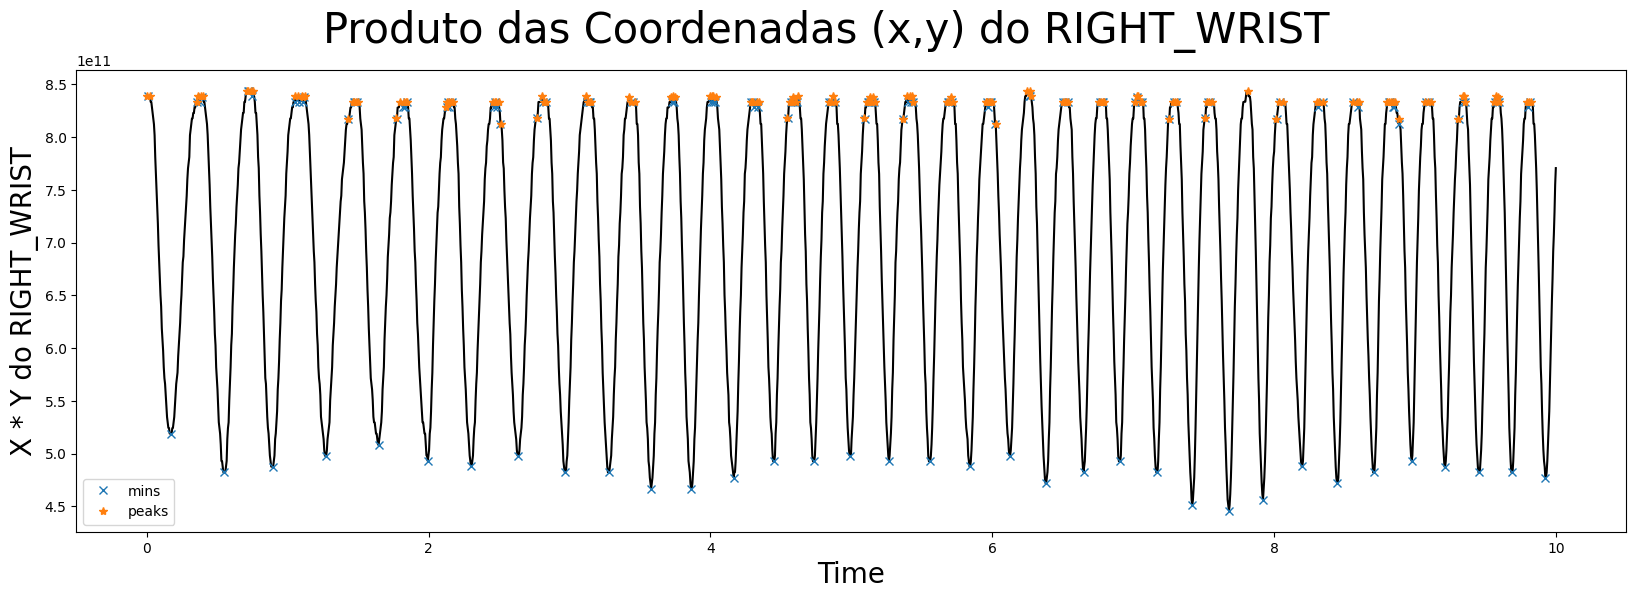

In [ ]:
series = poli_df[keypoint + '_X_Y']
peaks, _ = find_peaks(series)
mins, _ =find_peaks(series*-1)
x = np.linspace(0, 10, len(series))

plt.suptitle('Produto das Coordenadas (x,y) do ' + keypoint, fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('X * Y do ' + keypoint , fontsize='20')

plt.plot(x, series, color='black');
plt.plot(x[mins], series[mins], 'x', label='mins')
plt.plot(x[peaks], series[peaks], '*', label='peaks')
plt.legend()

In [ ]:
#Contando os mínimos da série original
mins.size

144

In [ ]:
peaks.size

144

In [ ]:
query_df = pd.read_csv("/content/" + filenameQuery)

#query_df[keypoint + "_Y"] = pd.to_numeric(query_df[keypoint + "_Y"])
#query_df[keypoint + "_X"] = pd.to_numeric(query_df[keypoint + "_X"])
#query_df[keypoint + "_X_Y"] = query_df[keypoint + "_X"] * query_df[keypoint + "_Y"]
#query_df = query_df[[keypoint + '_X_Y']].copy()

query_df[keypoint + "_Y"] = (pd.to_numeric(query_df[keypoint + "_Y"]) * 1000).astype('int')
query_df[keypoint + "_X"] = (pd.to_numeric(query_df[keypoint + "_X"]) * 1000).astype('int')
query_df[keypoint + "_Y"] = query_df[keypoint + "_Y"].map(lambda x: f'{x:0>6}')
query_df[keypoint + "_X"] = query_df[keypoint + "_X"].map(lambda x: f'{x:0>6}')
query_df[keypoint + "_X_Y"] = query_df[keypoint + "_Y"] + query_df[keypoint + "_X"]
query_df[keypoint + "_X_Y"] = pd.to_numeric(query_df[keypoint + "_X_Y"])
query_df = query_df[[keypoint + '_X_Y']].copy()

query_df.head()

,LEFT_WRIST_X_Y
0,838398644679
1,833371644718
2,833270649803
3,833185649855
4,833302650241


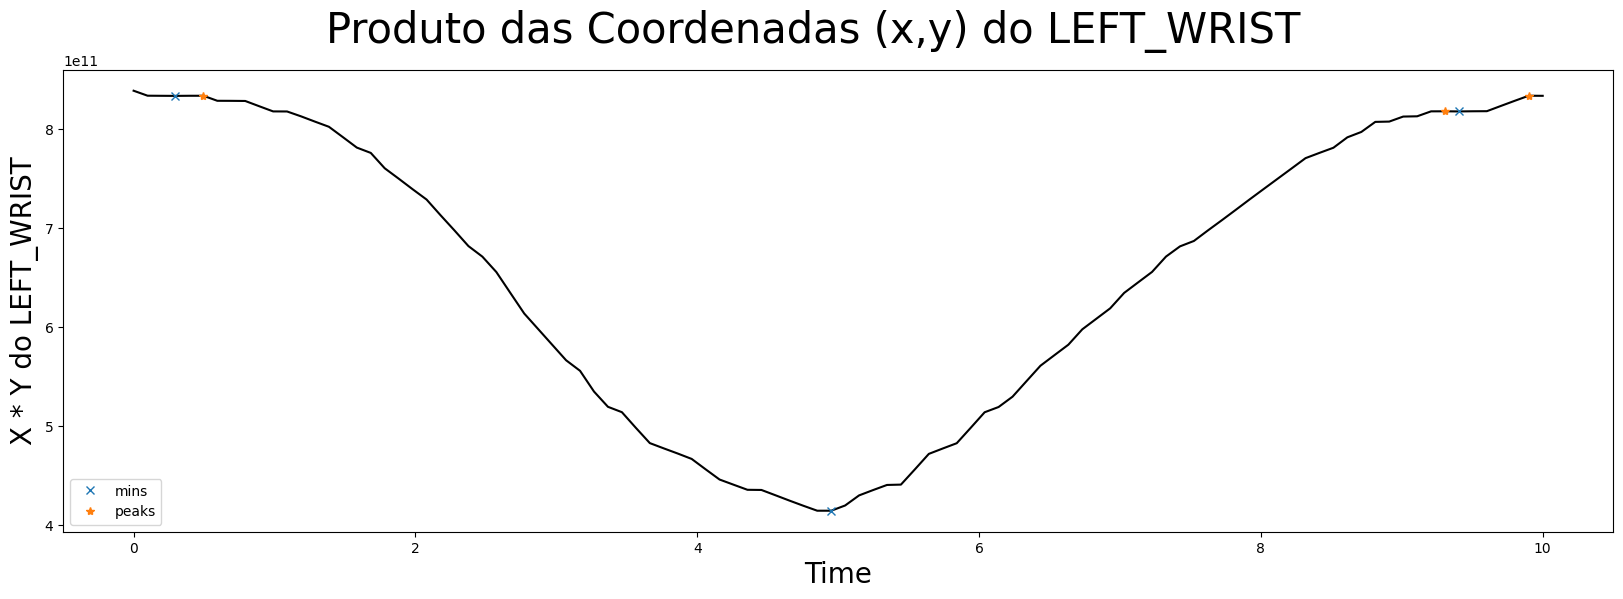

In [ ]:
series = query_df[keypoint + '_X_Y']
peaks, _ = find_peaks(series)
mins, _ =find_peaks(series*-1)
x = np.linspace(0, 10, len(series))

plt.suptitle('Produto das Coordenadas (x,y) do ' + keypoint, fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('X * Y do ' + keypoint , fontsize='20')

plt.plot(x, series, color='black');
plt.plot(x[mins], series[mins], 'x', label='mins')
plt.plot(x[peaks], series[peaks], '*', label='peaks')
plt.legend()

In [ ]:
#Executo a query de um polichileno na série de polichinelos
distance_profile = stumpy.mass(query_df[keypoint + "_X_Y"].astype(float), poli_df[keypoint + '_X_Y'].astype(float))

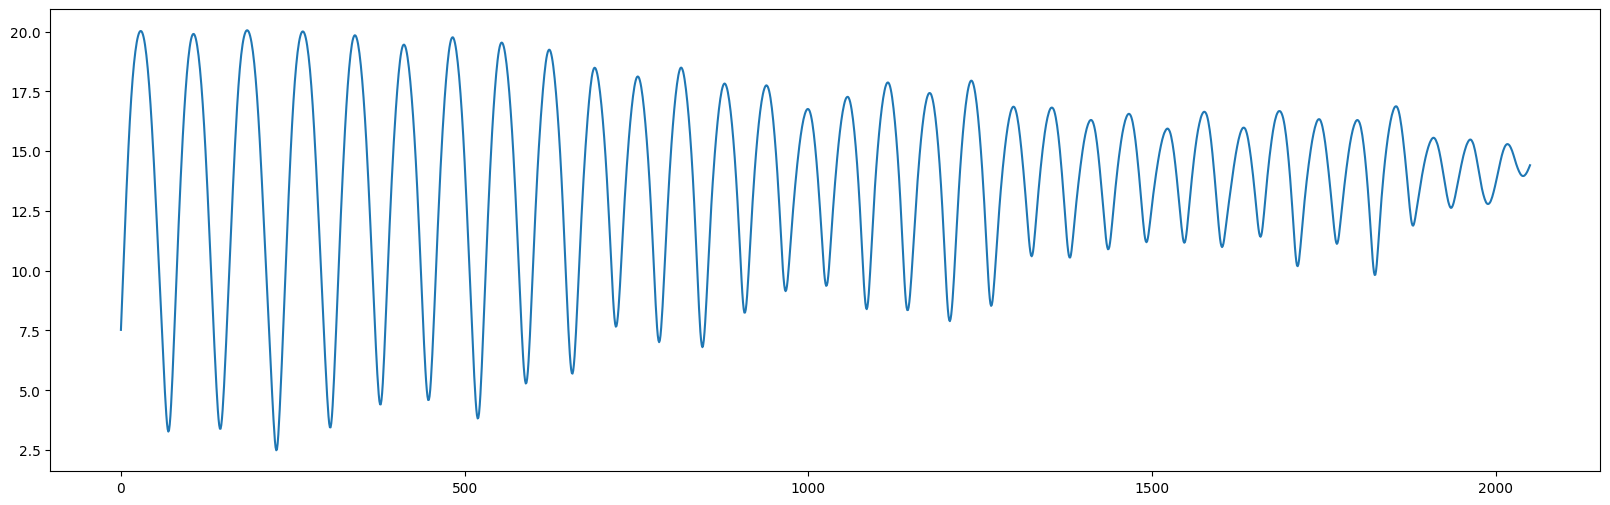

In [ ]:
plt.plot(distance_profile)
plt.show()

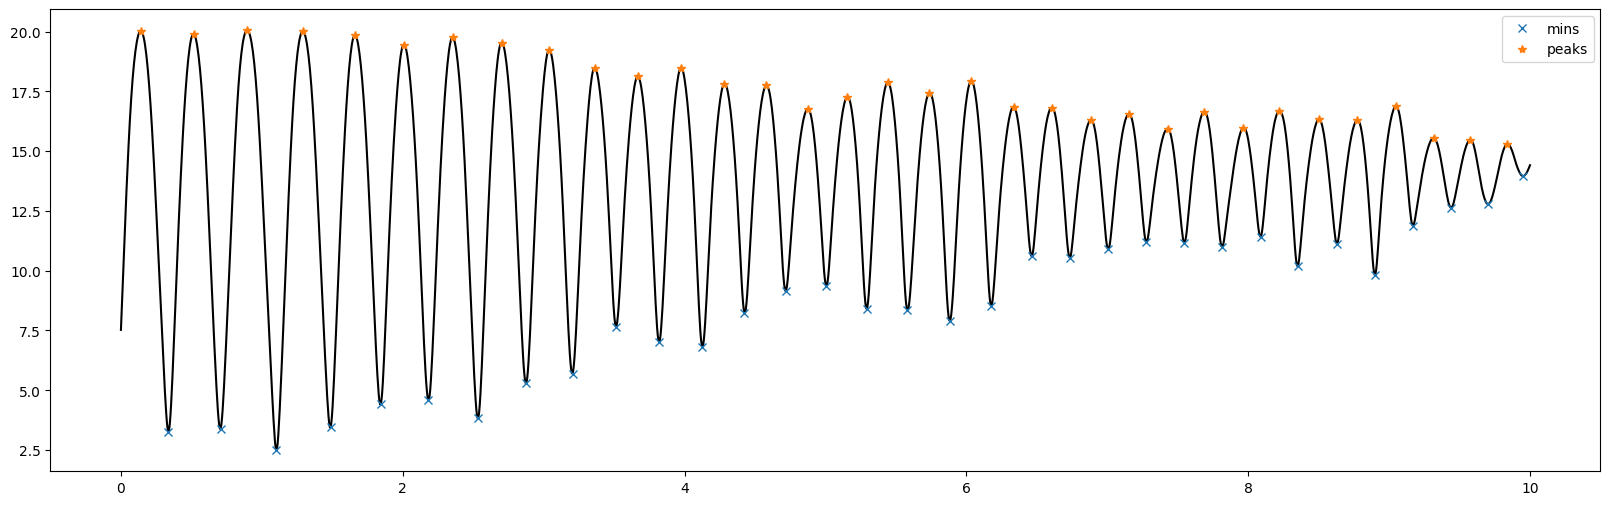

In [ ]:
series = distance_profile
peaks, _ = find_peaks(series)
mins, _ =find_peaks(series*-1)
x = np.linspace(0, 10, len(series))
plt.plot(x, series, color='black');
plt.plot(x[mins], series[mins], 'x', label='mins')
plt.plot(x[peaks], series[peaks], '*', label='peaks')
plt.legend()

In [ ]:
#Os mínimos batem com a quantidade de polichinelos executada de 120 polichinelos
mins.size

33

**NOVOS TESTES COM OUTRAS FUNÇÕES DO STUMPY**

In [ ]:
m = 40
mp = stumpy.stump(poli_df[keypoint + '_X_Y'].astype(float), m)

In [ ]:
mp

array([[0.2735642559139522, 82, -1, 82],
       [0.30010071762820706, 392, -1, 392],
       [0.30364095251019463, 393, -1, 393],
       ...,
       [0.32640246396150785, 2008, 2008, -1],
       [0.333212390915952, 1792, 1792, -1],
       [0.3387950567246923, 1793, 1793, -1]], dtype=object)

The motif is located at index 1159
The nearest neighbor is located at index 1616


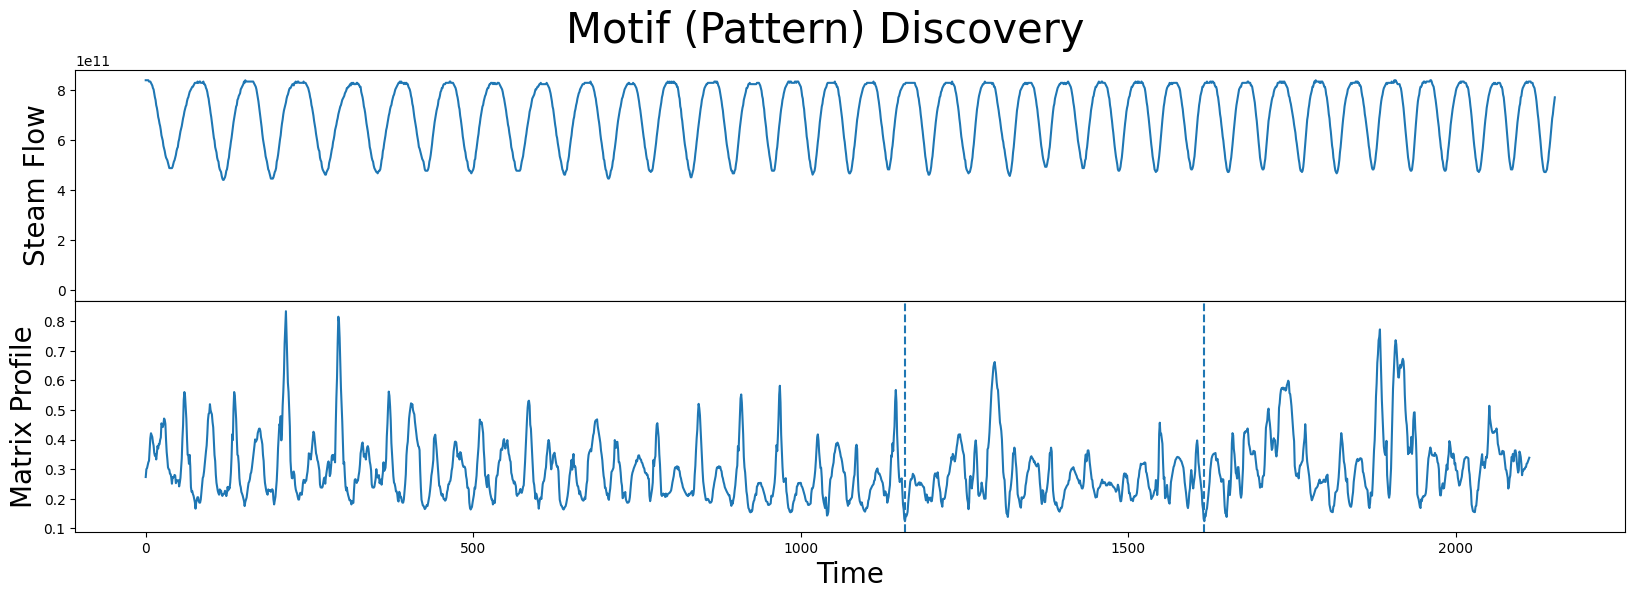

In [ ]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(poli_df[keypoint + '_X_Y'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 20, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [ ]:
matches = stumpy.match(query_df[keypoint + "_X_Y"].astype(float), poli_df[keypoint + '_X_Y'].astype(float))

In [ ]:
matches.size

18

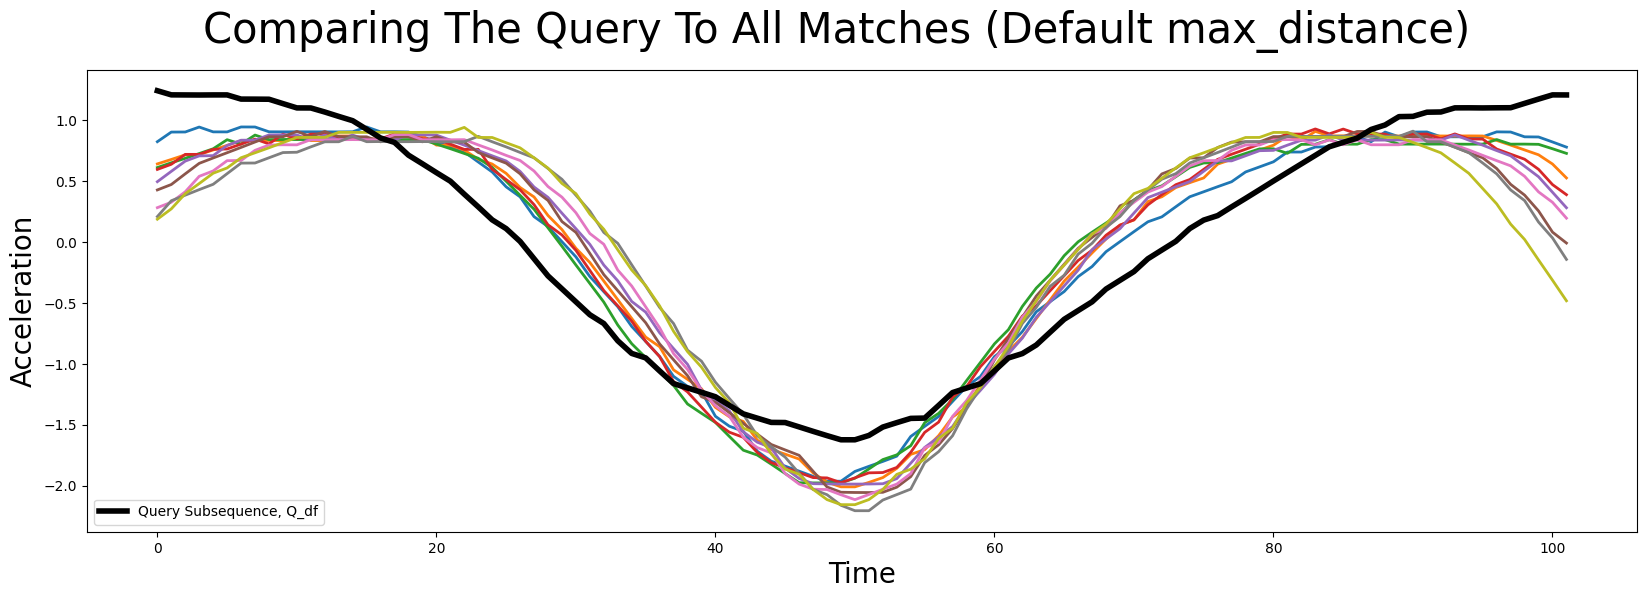

In [ ]:
# Since MASS computes z-normalized Euclidean distances, we should z-normalize our subsequences before plotting
Q_z_norm = stumpy.core.z_norm(query_df[keypoint + "_X_Y"].values)

plt.suptitle('Comparing The Query To All Matches (Default max_distance)', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Acceleration', fontsize='20')
for match_distance, match_idx in matches:
    match_z_norm = stumpy.core.z_norm(poli_df[keypoint + '_X_Y'].values[match_idx:match_idx+len(query_df[keypoint + "_X_Y"])])
    plt.plot(match_z_norm, lw=2)
plt.plot(Q_z_norm, lw=4, color="black", label="Query Subsequence, Q_df")
plt.legend()
plt.show()